# Predicting house prices
Now, it's your turn to design your first regression model. In this module, you'll be using a version of the houseprices dataset from Kaggle that you've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa.

Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

To complete this assessment, create a Jupyter Notebook containing your solutions to the following tasks:
* Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. 
* Please follow the example above and call `engine.dispose()` when you no longer need to make database queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.


In [2]:
# Load the dataset from the Thinkful PostgreSQL database. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

houseprices_df.info()
houseprices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


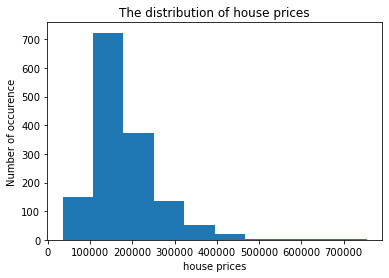

In [12]:
plt.hist(houseprices_df.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("house prices")
plt.ylabel("Number of occurence")
plt.show()

In [23]:
# I decided to use the overall condition for predicting the houseprice.
houseprices_df['overallcond'].value_counts()
cond_df = pd.get_dummies(houseprices_df['overallcond'])

Y = houseprices_df['saleprice']
X = cond_df

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-2.41369176e+18 -2.41369176e+18 -2.41369176e+18 -2.41369176e+18
 -2.41369176e+18 -2.41369176e+18 -2.41369176e+18 -2.41369176e+18
 -2.41369176e+18]

Intercept: 
 2.41369176287552e+18


In [25]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     26.00
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           7.96e-38
Time:                        18:25:08   Log-Likelihood:                -18446.
No. Observations:                1460   AIC:                         3.691e+04
Df Residuals:                    1451   BIC:                         3.696e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.312e+05   8581.863     15.291      0.000    1.14e+05    1.48e+05
1          -7.023e+04   6.72e+04     -1.045      0.296   -2.02e+05    6.16e+04
2           1.076e+04    3.1e+04      0.347      0.729   -5.01e+04    7.16e+04
3           -2.93e+04   1.59e+04     -1.848      0.065   -6.04e+04    1796.296
4          -1.079e+04   1.23e+04     -0.876      0.381   -3.49e+04    1.34e+04
5           7.192e+04   8891.378      8.089      0.000    5.45e+04    8.94e+04
6           2.274e+04   9553.431      2.380      0.017    3995.128    4.15e+04
7           2.692e+04   9762.565      2.757      0.006    7768.787    4.61e+04
8           2.443e+04   1.16e+04      2.100      0.036    1606.790    4.72e+04
9           8.478e+04   1.66e+04      5.108      0.000    5.22e+04    1.17e+05
==============================================================================
Omnibus:                      647.940   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4639.706
Skew:                           1.923   Prob(JB):                         0.00
Kurtosis:                      10.841   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""